In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from hottbox.core import Tensor, TensorTKD
from hottbox.algorithms.decomposition import HOSVD, HOOI
from hottbox.utils.generation import residual_tensor
from coursework.data import get_image, plot_tensors

In [3]:
np.random.seed(0)

[Return to Table of Contents](./0_Table_of_contents.ipynb)

# Tucker Decomposition

<img src="./imgs/TensorTKD.png" alt="Drawing" style="width: 500px;"/>

In previous [assignment](./2_Efficient_representation_of_multidimensional_arrays.ipynb), you have been provided materials which cover efficient representations of mutlidimensional arrays of data, such as the Tucker form. In this module, you will take a closer look at it and the assiciated computational methods.


Any tensor of arbitrarily large order can be decomposed in the Tucker form. As illustrated above, a tensor $\mathbf{\underline{X}} \in \mathbb{R}^{I \times J \times K}$ can be represented as a dense core tensor $\mathbf{\underline{G}}$ and a set of factor matrices $\mathbf{A} \in \mathbb{R}^{I \times Q}, \mathbf{B} \in \mathbb{R}^{J \times R}$ and $\mathbf{C} \in
\mathbb{R}^{K \times P}$

$$
\mathbf{\underline{X}} = \mathbf{\underline{G}} \times_1 \mathbf{A} \times_2 \mathbf{B} \times_3 \mathbf{C} = \Big[    \mathbf{\underline{G}} ;  \mathbf{A},  \mathbf{B}, \mathbf{C}      \Big]
$$


On practice, there exist several computational methods to accomplish this all of which are combined into a Tucker Decomposition framework. The two most commonly used algorithms are:
1. Higher Order Singular Value Decomposition ([HOSVD](#Higher-Order-Singular-Value-Decomposition-(HOSVD)))
1. Higher Order Orthogonal Iteration ([HOOI](#Higher-Order-Orthogonal-Iteration-(HOOI)))


# Higher Order Singular Value Decomposition (HOSVD)

The HOSVD is a special case of the Tucker decomposition, in which all the factor matrices are constrained to be orthogonal. They are computed as truncated version of the left singular matrices of all possible mode-$n$ unfoldings of tensor $\mathbf{\underline{X}}$:

$$
\begin{aligned}
\mathbf{X}_{(1)} &= \mathbf{U}_1  \mathbf{\Sigma}_1 \mathbf{V}_1^T \quad \rightarrow \quad \mathbf{A} = \mathbf{U}_1[1:R_1]\\
\mathbf{X}_{(2)} &= \mathbf{U}_2  \mathbf{\Sigma}_2 \mathbf{V}_2^T \quad \rightarrow \quad \mathbf{B} = \mathbf{U}_2[1:R_2] \\
\mathbf{X}_{(3)} &= \mathbf{U}_3  \mathbf{\Sigma}_3 \mathbf{V}_3^T \quad \rightarrow \quad \mathbf{C} = \mathbf{U}_3[1:R_3] \\
\end{aligned}
$$

After factor matrices are obtained, the core tensor $\mathbf{\underline{G}}$ is computed as

$$
\mathbf{\underline{G}} = \mathbf{\underline{X}} \times_1 \mathbf{A}^T \times_2 \mathbf{B}^T \times_3 \mathbf{C}^T        
$$


# Higher Order Orthogonal Iteration (HOOI)

HOOI algorithm is another special case of the Tuker decomposition. Like HOSVD, it decomposes a tensor into a dense core tensor and orthogonal factor matrices. The difference between the two lies in the fact that in HOOI the factor matrices are optimized iteratively using an Alternating Least Squares (ALS) approach. In other words, the tucker representation $[ \mathbf{\underline{G}};\mathbf{A}^{(1)}, \mathbf{A}^{(2)}, \cdots,\mathbf{A}^{(N)} ]$ of the given tensor $\mathbf{\underline{X}}$ is obtained through the HOOI as follows

$$
\begin{aligned}
&\mathbf{\underline{Y}} = \mathbf{\underline{X}} \times_1 \mathbf{A}^{(1)T} \times_2 \cdots \times_{n-1} \mathbf{A}^{(n-1)T} \times_{n+1} \mathbf{A}^{(n+1)} \times \cdots \times_N \mathbf{A}^{(N)} \\
&\mathbf{A}^{(n)} \leftarrow R_n \text{ leftmost singular vectors of } \mathbf{Y}_{(n)}
\end{aligned}
$$

The above is repeated until convergence, then the core tensor $\mathbf{\underline{G}} \in \mathbb{R}^{R_1 \times R_2 \times \cdots \times R_N}$ is computed as

$$
\mathbf{\underline{G}} = \mathbf{\underline{X}} \times_1 \mathbf{A}^{(1)T}  \times_2 \mathbf{A}^{(2)T} \times_3 \cdots  \times_N \mathbf{A}^{(N)T}
$$

# Multi-linear rank

The **multi-linear rank** of a tensor $\mathbf{\underline{X}} \in \mathbb{R}^{I_1 \times \cdots \times I_N}$ is the $N$-tuple $(R_1, \dots, R_N)$ where each $R_n$ is the rank of the subspace spanned by mode-$n$ fibers, i.e. $R_n = \text{rank} \big( \mathbf{X}_{(n)} \big)$. Thus, for our order-$3$ tensor the multi-linear rank is $(R_1, R_2, R_3)$. Multi-linear rank provides flexibility in compression and approximation of the original tensor.

> **NOTE:** For a tensor of order $N$ the values $R_1, R_2, \dots , R_N$ are not necessarily the same, whereas, for matrices (tensors of order 2) the equality $R_1 = R_2$ always holds, where $R_1$ and $R_2$ are the matrix column rank and row rank respectively.



# Performing tensor decomposition

In [4]:
# Create tensor
I, J, K = 5, 6, 7
array_3d = np.random.rand(I * J * K).reshape((I, J, K)).astype(np.float)
tensor = Tensor(array_3d)

# Initialise algorithm
algorithm = HOSVD()

# Perform decomposing for selected multi-linear rank
ml_rank = (4, 5, 6)
tensor_tkd = algorithm.decompose(tensor, ml_rank)

# Result preview
print(tensor_tkd)

print('\n\tFactor matrices')
for mode, fmat in enumerate(tensor_tkd.fmat):
    print('Mode-{} factor matrix is of shape {}'.format(mode, fmat.shape))
    
print('\n\tCore tensor')
print(tensor_tkd.core)

AttributeError: module 'numpy' has no attribute 'float'.
`np.float` was a deprecated alias for the builtin `float`. To avoid this error in existing code, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

# Evaluation and reconstruction

Tucker representation of an original tensor is almost always an approximation, regardless of which algorithm has been employed for performing decomposition. Thus, relative error of approximation is commonly used in order to evaluate performance of computational methods, i.e. the ratio between a Frobenious norms of residual and original tensors.

In [ ]:
# Compute residual tensor
tensor_res = residual_tensor(tensor, tensor_tkd)

# Compute error of approximation
rel_error = tensor_res.frob_norm / tensor.frob_norm

print("Relative error of approximation = {}".format(rel_error))

## **Assigment 1**

1. Create a tensor of order 4 with sizes of each mode being defined by prime numbers and  obtain a Tucker representation using HOOI algorithm with multi-linear (4, 10, 6, 2). Then calculation ratio between the number of elements in the original tensor and its Tucker form.

1. For a tensor that consists of 1331 elements, which multi-linear rank guarantees a perfect reconstruction from its Tucker form and why. Is such choice reasonable for practical applications?


### Solution: Part 1

In [5]:
# Create a tensor
# Define tensor dimensions (using prime numbers)
I, J, K, L = 5, 7, 11, 3  # Prime numbers

# Generate random tensor
array_4d = np.random.rand(I * J * K * L).reshape(I, J, K, L)
tensor = Tensor(array_4d)

In [6]:
# Perform decomposition
multi_linear_rank = (4, 10, 6, 2)  # Given Tucker rank
algorithm = HOOI()  # Initialize HOOI algorithm
tensor_tkd = algorithm.decompose(tensor, multi_linear_rank)

In [7]:
# Print ratio
# Compute ratio between number of elements in original tensor and Tucker form
original_elements = np.prod(tensor.shape)
core_elements = np.prod(tensor_tkd.core.shape)
ratio = original_elements / core_elements

# Print results
# Result preview
print(tensor_tkd)
print(f"Original tensor shape: {tensor.shape}")
print(f"Tucker core tensor shape: {tensor_tkd.core.shape}")
print(f"Compression ratio: {ratio:.4f}")

Tucker representation of a tensor with multi-linear rank=(4, 7, 6, 2).
Factor matrices represent properties: ['mode-0', 'mode-1', 'mode-2', 'mode-3']
With corresponding latent components described by (5, 7, 11, 3) features respectively.
Original tensor shape: (5, 7, 11, 3)
Tucker core tensor shape: (4, 7, 6, 2)
Compression ratio: 3.4375


### Solution: Part 2

**Answer with Explanations**

For a tensor with 1331 elements, its perfect reconstruction from the Tucker form requires that the multi-linear rank matches its original dimensions. Since $1331 = 11^3$, the tensor could have dimensions (11, 11, 11). To guarantee perfect reconstruction, the Tucker decomposition must retain all the original features, meaning the core tensor should have the same shape as the original tensor (11, 11, 11) and the factor matrices should be square and full-rank. This ensures no information loss in the decomposition. However, the choice is not always reasonable in practical applications, as the main purpose of Tucker decomposition is compression and dimensionality reduction. Keeping the full rank lose the compression benefit and increases computational cost.

# Application: Image compression 

Color images can be naturally represented as a tensor of order three with the shape `(height x width x channels)` where channels are, for example, Red, Blue and Green (RGB)

<img src="./imgs/image_to_base_colors.png" alt="Drawing" style="width: 500px;"/>

By keeping its original structure, allows to apply methods from multi-linear analysis. For instance, we can employ algorithms for Tucker decompositions in order to commress oringinal informaiton by varying values of desired multi-linear rank.

```python
# Get data in form of a Tensor
car = get_image(item="car", view="top")
tensor = Tensor(car)

# Initialise algorithm and preform decomposition
algorithm = HOSVD()
tensor_tkd = algorithm.decompose(tensor, rank=(25, 25, 3))

# Evaluate result
tensor_res = residual_tensor(tensor, tensor_tkd)
rel_error = tensor_res.frob_norm / tensor.frob_norm

print("Relative error of approximation = {}".format(rel_error))
```

When can also visually inspect image obtained by reconstructing the Tucker representation
```python
# Reconstruction
tensor_rec = tensor_tkd.reconstruct()

# Plot original and reconstructed images side by side
plot_tensors(tensor, tensor_rec)
```

<img src="./imgs/car_orig_vs_reconstructed_25_25_3.png" alt="Drawing" style="width: 500px;"/>

## **Assigment 2**
For this assignment you are provided with function `get_image()` which requires two parameters: `item` and `view`. The valid values for former are **car** and **apple**, while the latter takes only **side** and **top**. 

1. Use multi-linear rank equal to `(50, 50, 2)` in order to obtain Tucker representations of images of the car and apple. Analyse results by visually inspecting their reconstructions.

1. Use multi-linear rank equal to `(50, 50, 2)` in order to obtain Tucker representations of images of the apple taken from the top and from the side. Analyse results by visually inspecting their reconstructions.

1. What would happen to the reconstruction if the value of multi-linear rank corresponding to the channel mode is decreased to 1.


### Solution: Part 1

In [8]:
# Create tensors from images
car_image = get_image(item="car", view="top")
apple_image = get_image(item="apple", view="top")

tensor_car = Tensor(car_image)
tensor_apple = Tensor(apple_image)

In [9]:
# Perform decomposition
algorithm = HOSVD()
tucker_rank = (50, 50, 2)

tensor_car_tkd = algorithm.decompose(tensor_car, rank=tucker_rank)
tensor_apple_tkd = algorithm.decompose(tensor_apple, rank=tucker_rank)

Relative error of approximation for car image = 0.04991577804571518
Relative error of approximation for apple image = 0.03706225838740838


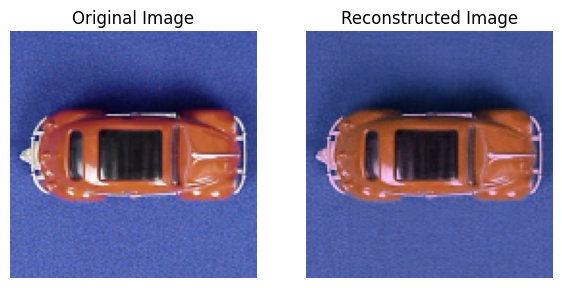

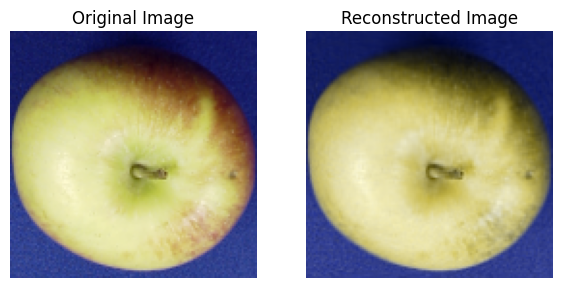

In [10]:
# Evaluate results
tensor_car_res = residual_tensor(tensor_car, tensor_car_tkd)
tensor_apple_res = residual_tensor(tensor_apple, tensor_apple_tkd)

rel_error_car = tensor_car_res.frob_norm / tensor_car.frob_norm
rel_error_apple = tensor_apple_res.frob_norm / tensor_apple.frob_norm

print("Relative error of approximation for car image =", rel_error_car)
print("Relative error of approximation for apple image =", rel_error_apple)

# Reconstruction
tensor_car_rec = tensor_car_tkd.reconstruct()
tensor_apple_rec = tensor_apple_tkd.reconstruct()

# Plot original and reconstructed images side by side
plot_tensors(tensor_car, tensor_car_rec)
plot_tensors(tensor_apple, tensor_apple_rec)

**Include your explanations here**

The Tucker decomposition effectively captures the primary structural and color information. The relative error of approximation for the car image is 0.0499, while for the apple image, it is 0.0371, suggesting that the compression retains a high level of fidelity. The reconstructed car image maintains its overall shape and color distribution, though minor losses in fine details such as texture and shadows are noticeable. The apple image shows an almost perfect reconstruction with shading well preserved but losing smooth gradient transitions on color. Overall, the Tucker decomposition with the chosen multi-linear rank (50, 50, 2) provides a high-quality reconstruction with minimal error, making it an effective method for image compression while retaining essential visual features.

### Solution: Part 2

In [11]:
# Create tensors from images
apple_top = get_image(item="apple", view="top")
apple_side = get_image(item="apple", view="side")

tensor_top = Tensor(apple_top)
tensor_side = Tensor(apple_side)

In [12]:
# Perform decomposition
algorithm = HOSVD()
tucker_rank = (50, 50, 2)

tensor_tkd_top = algorithm.decompose(tensor_top, rank=tucker_rank)
tensor_tkd_side = algorithm.decompose(tensor_side, rank=tucker_rank)

Relative error of approximation for apple (top view) = 0.037062258387408155
Relative error of approximation for apple (side view) = 0.0657469040602635


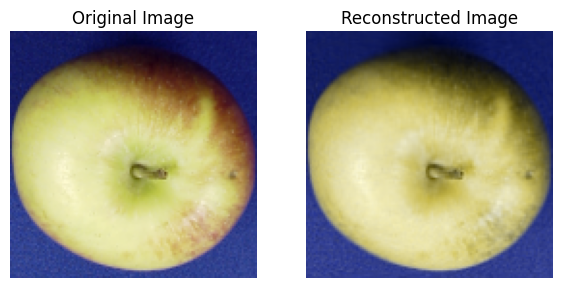

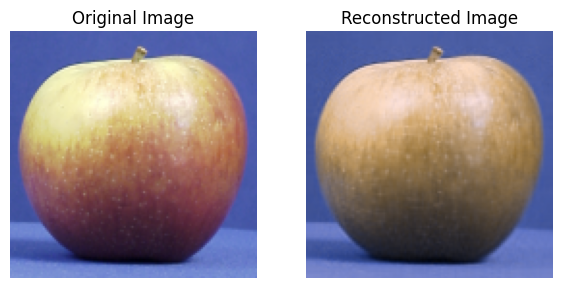

In [13]:
# Evaluate results
tensor_res_top = residual_tensor(tensor_top, tensor_tkd_top)
tensor_res_side = residual_tensor(tensor_side, tensor_tkd_side)

rel_error_top = tensor_res_top.frob_norm / tensor_top.frob_norm
rel_error_side = tensor_res_side.frob_norm / tensor_side.frob_norm

print("Relative error of approximation for apple (top view) =", rel_error_top)
print("Relative error of approximation for apple (side view) =", rel_error_side)

# Reconstruct and visualize
tensor_rec_top = tensor_tkd_top.reconstruct()
tensor_rec_side = tensor_tkd_side.reconstruct()

# Plot original and reconstructed images
plot_tensors(tensor_top, tensor_rec_top)
plot_tensors(tensor_side, tensor_rec_side)

**Include your explanations here**

The reconstruction results for the apple images using Tucker decomposition with a multi-linear rank of (50, 50, 2) show that the essential structural details are preserved but some degree of blurring and color degradation is noticeable.

For the top view of the apple, the relative error of approximation is 0.037, indicating a high-fidelity reconstruction. Visually, the shape and key features of the apple are remained, with reducing fine texture details and losting color transitions.

For the side view of the apple, the relative error of approximation is 0.066, which is slightly higher than that of the top view. The general shape and structure of the apple are also preserved, but there is noticeable color loss and reduced sharpness, especially in the apple’s texture and shading.

Overall, the Tucker decomposition effectively compresses the image while retaining most of the essential features. However, some loss of high-frequency details and slight blurring effects are visible, which is caused by reducing dimensionality in image compression.

### Solution: Part 3

**Include your explanations here**

If the multi-linear rank corresponding to the channel mode is decreased to 1, the reconstructed image will lose color information, becoming grayscale. This occurs because the Tucker decomposition changes the three RGB color channels into a single component, eliminating red, green, and blue variations. While the spatial structure including edges and shapes remains intact, the color details are lost. This results in a more compressed representation with reduced storage and computational requirements, but with the cost of color fidelity. The example code below demonstrates the effect by applying Tucker decomposition to an image with a reduced channel rank, leading to a grayscale reconstruction. The approximation error is expected to be higher compared to using a rank of 2 or 3 for the channel mode, indicating some loss of detail. This approach may be useful in applications where structural information is more important than color, such as some senario about image compression or pattern recognition tasks.

Relative error of approximation = 0.1928310530144666


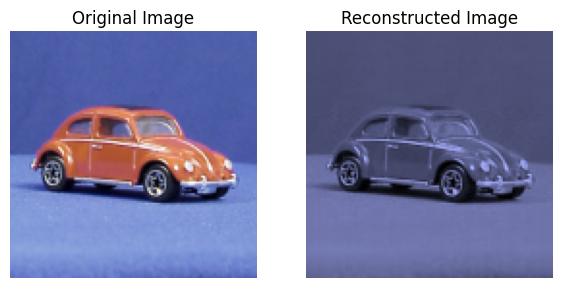

In [14]:
# Get image data in tensor form
car_image = get_image(item="car", view="side")
tensor = Tensor(car_image)

# Initialize and perform Tucker decomposition with reduced channel rank
algorithm = HOSVD()
tucker_rank = (50, 50, 1)  # Reduced channel mode rank to 1
tensor_tkd = algorithm.decompose(tensor, rank=tucker_rank)

# Compute reconstruction
tensor_rec = tensor_tkd.reconstruct()

# Compute approximation error
tensor_res = residual_tensor(tensor, tensor_tkd)
rel_error = tensor_res.frob_norm / tensor.frob_norm
print("Relative error of approximation =", rel_error)

# Plot the original and reconstructed images
plot_tensors(tensor, tensor_rec)